# Time Series Forecasting Models for Demand Prediction

This notebook demonstrates the implementation of multiple time series forecasting models as part of the **FutureCart: AI-Driven Demand Prediction for Smarter Retail** project. The goal is to predict product demand using historical sales data and external variables such as Google Analytics and social media metrics.

I have implemented six different forecasting models: **Autoregression (AR)**, **Moving Average (MA)**, **ARIMA**, **SARIMA**, **ARIMAX**, and **SARIMAX**. Each model provides unique insights into the data and caters to different requirements of time series forecasting.

### **Import Necessary Libraries**

This block includes the import of essential libraries such as `pandas`, `matplotlib`, `statsmodels`, and `sklearn`. These libraries were used for time series analysis, data visualization, and model evaluation.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

## Step 1: Load the Dataset

I started by loading the dataset using the `pandas` library and made sure the file path was correct. The dataset contains key information like sales data and external factors such as clicks and impressions. This step was essential to set up the base for the entire forecasting process.


## Step 2: Define Target and Exogenous Columns

Here, I defined:
- The `target_column` as "Quantity," which is the variable I want to forecast.
- The `exogenous_columns` as "Clicks" and "Impressions," representing external factors that might influence the target variable.

This made it clear which variables were the focus of my analysis.

## Step 3: Prepare the Data

In this step:
1. **Cleaning the Data**: I removed any missing values from both the target and exogenous variables to ensure smooth processing.
2. **Matching the Data Lengths**: I aligned the target and exogenous variables by trimming them to the same number of observations, avoiding any length mismatches.
3. **Verifying the Data**: I displayed the first 5 rows of both the target and exogenous datasets to confirm that the data was loaded and cleaned properly.

**This preparation ensured that the data was clean and ready for further analysis.**


In [2]:
# Step 1: Load the dataset
data = pd.read_excel('../datasets/master_dataset/master_dataset.xlsx')  # Ensure correct dataset path

# Step 2: Define target and exogenous columns
target_column = "Quantity"  # The main column for forecasting
exogenous_columns = ["Clicks", "Impressions"]  # Exogenous variables

# Step 3: Prepare the data
time_series = data[target_column].dropna()  # Remove missing values in the target column
exogenous_data = data[exogenous_columns].dropna()  # Remove missing values in exogenous variables

# Ensure the lengths of target and exogenous variables match
min_length = min(len(time_series), len(exogenous_data))
time_series = time_series.iloc[:min_length]
exogenous_data = exogenous_data.iloc[:min_length]

# Display first few rows
print(f"First 5 rows of the target column '{target_column}':\n", time_series.head())
print(f"First 5 rows of exogenous variables:\n", exogenous_data.head())

First 5 rows of the target column 'Quantity':
 0    14
1    10
2    13
3    22
4    33
Name: Quantity, dtype: int64
First 5 rows of exogenous variables:
    Clicks  Impressions
0     445          620
1     433          890
2     424          851
3     427          881
4     451          678


## Step 4: Check Stationarity of the Target Column

In this step, I checked whether the target variable, `Quantity`, was stationary using the Augmented Dickey-Fuller (ADF) test. Stationarity is a crucial property for time series forecasting, as many models assume that the data does not change its statistical properties over time.

- **ADF Test Outputs**: 
  - The Dickey-Fuller test statistic and p-value were printed to evaluate stationarity. 
  - A p-value greater than 0.05 indicated that the target column was non-stationary.

### Actions Taken:
1. **Non-Stationary Data**: 
   - If the target column was non-stationary, I applied differencing to make it stationary. 
   - Additionally, I adjusted the exogenous data to ensure alignment with the differenced time series.
2. **Stationary Data**: 
   - If the target column was stationary, no modifications were applied, and the original data was retained.

**This step ensured that the target variable met the assumptions required for time series modeling.**

In [3]:
# Step 4: Check stationarity of the target column
adf_test = adfuller(time_series)
print(f"Dickey-Fuller Test Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] > 0.05:
    print(f"The target column '{target_column}' is non-stationary. Applying differencing...")
    time_series_diff = time_series.diff().dropna()
    exogenous_data = exogenous_data.iloc[1:].reset_index(drop=True)
else:
    print(f"The target column '{target_column}' is stationary.")
    time_series_diff = time_series

Dickey-Fuller Test Statistic: -4.445717448758575
p-value: 0.00024615679644112006
The target column 'Quantity' is stationary.


## Step 5.1: Autoregression (AR) Model

In this step, I implemented and evaluated the **Autoregression (AR)** model, which predicts future values of the time series based on its own lagged values.

### Actions Taken:
1. **Model Implementation**:
   - I used the `AutoReg` function with a lag of 1 to fit the AR model to the time series data.
   - This model assumes that the current value of the series depends linearly on its past values.

2. **Model Evaluation**:
   - After fitting the model, I printed the summary to understand the coefficients and statistical significance of the parameters.

3. **Prediction**:
   - Predictions were generated for the time series, starting from the second data point to the last.
   - The actual and predicted values were visualized in a line plot for easy comparison.

### Insights:
The **Autoregression (AR)** model provided a simple yet effective way to understand and forecast the time series using its past values. The visualization helped assess how well the model captured the trends and patterns in the data.


In [4]:
# Step 5: Implement and evaluate each model

# 5.1 Autoregression (AR)
def run_autoregression(series):
    ar_model = AutoReg(series, lags=1).fit()
    print("\nAutoregression (AR) Model Summary:")
    print(ar_model.summary())

    predictions = ar_model.predict(start=1, end=len(series) - 1)
    plt.figure(figsize=(10, 6))
    plt.plot(series[1:], label="Actual")
    plt.plot(predictions, label="Predicted", linestyle="--")
    plt.title("Autoregression (AR) Model")
    plt.legend()
    plt.show()

## Step 5.2: Moving Average (MA) Model

In this step, I implemented the **Moving Average (MA)** model to smooth the time series data and highlight underlying trends.

### Actions Taken:
1. **Model Implementation**:
   - I applied a rolling window of size 3 to calculate the moving average, which smoothens the series by averaging over the specified window size.

2. **Visualization**:
   - The original time series was plotted alongside the smoothed moving average series.
   - This visualization helped highlight patterns and trends while reducing noise in the data.

### Insights:
The **Moving Average (MA)** model effectively smoothed the data, making trends and seasonal variations more apparent. This step was particularly useful for exploratory analysis and identifying long-term patterns in the time series.


In [5]:
# 5.2 Moving Average (MA)
def run_moving_average(series, window_size=3):
    moving_avg = series.rolling(window=window_size).mean()
    plt.figure(figsize=(10, 6))
    plt.plot(series, label="Original")
    plt.plot(moving_avg, label="Moving Average", linestyle="--")
    plt.title("Moving Average (MA) Model")
    plt.legend()
    plt.show()

## Step 5.3: ARIMA Model

Here, I implemented the **Autoregressive Integrated Moving Average (ARIMA)** model, which combines autoregression (AR), differencing (I), and moving average (MA) components to model the time series.

### Actions Taken:
1. **Model Setup**:
   - I used the `SARIMAX` class from the `statsmodels` library to configure and fit the ARIMA model with parameters:
     - `p`: The number of autoregressive terms.
     - `d`: The degree of differencing to make the series stationary.
     - `q`: The number of moving average terms.

2. **Model Evaluation**:
   - I generated predictions for the time series and compared them against actual values from the dataset.

3. **Visualization**:
   - Plotted the actual values of the time series alongside the predicted values to visualize the model’s accuracy.

### Insights:
The **ARIMA Model** effectively captured trends and seasonality in the time series by combining AR and MA components while addressing non-stationarity through differencing. The visualization of actual vs. predicted values provided clear insights into the model’s performance.


In [6]:
# 5.3 ARIMA
def run_arima(series, p=1, d=1, q=1):
    arima_model = SARIMAX(series, order=(p, d, q)).fit(disp=False)
    print("\nARIMA Model Summary:")
    print(arima_model.summary())

    predictions = arima_model.predict(start=1, end=len(series) - 1)
    plt.figure(figsize=(10, 6))
    plt.plot(series[1:], label="Actual")
    plt.plot(predictions, label="Predicted", linestyle="--")
    plt.title("ARIMA Model")
    plt.legend()
    plt.show()

## Step 5.4: SARIMA Model

In this step, I implemented the **Seasonal Autoregressive Integrated Moving Average (SARIMA)** model, which extends the ARIMA model by incorporating seasonality.

### Actions Taken:
1. **Model Setup**:
   - I utilized the `SARIMAX` class from the `statsmodels` library to fit the SARIMA model.
   - Parameters used:
     - `p`, `d`, `q`: Non-seasonal ARIMA parameters.
     - `P`, `D`, `Q`: Seasonal components for AR, differencing, and MA.
     - `s`: Seasonal period (e.g., 12 for monthly seasonality).

2. **Model Evaluation**:
   - Predicted values for the time series were computed, accounting for both non-seasonal and seasonal components.

3. **Visualization**:
   - Plotted the actual vs. predicted values to assess the model's performance in capturing seasonality and trends.

### Insights:
The **SARIMA Model** was effective in modeling the time series by explicitly incorporating seasonal patterns. The visualization demonstrated how the model handled seasonal fluctuations along with general trends, making it suitable for datasets with recurring patterns.


In [7]:
# 5.4 SARIMA
def run_sarima(series, p=1, d=1, q=1, P=1, D=1, Q=1, s=12):
    sarima_model = SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=False)
    print("\nSARIMA Model Summary:")
    print(sarima_model.summary())

    predictions = sarima_model.predict(start=1, end=len(series) - 1)
    plt.figure(figsize=(10, 6))
    plt.plot(series[1:], label="Actual")
    plt.plot(predictions, label="Predicted", linestyle="--")
    plt.title("SARIMA Model")
    plt.legend()
    plt.show()

## Step 5.5: ARIMAX Model

In this step, I implemented the **Autoregressive Integrated Moving Average with Exogenous Variables (ARIMAX)** model. This model extends ARIMA by incorporating external (exogenous) variables that may influence the target time series.

### Actions Taken:
1. **Model Setup**:
   - I utilized the `SARIMAX` class from the `statsmodels` library to fit the ARIMAX model.
   - Parameters used:
     - `p`, `d`, `q`: Non-seasonal ARIMA parameters.
     - `exog`: Exogenous variables (`Clicks`, `Impressions`) were included to enhance the predictive power.

2. **Model Evaluation**:
   - Predicted values were computed based on the target series and the exogenous variables.
   - Predictions were adjusted to align with the target series for better comparison.

3. **Visualization**:
   - Plotted the actual vs. predicted values to observe how well the model captured the relationship between the target variable and the exogenous variables.

### Insights:
The **ARIMAX Model** effectively incorporated additional explanatory variables (`Clicks`, `Impressions`), which improved its ability to capture trends and fluctuations in the target series. This makes ARIMAX particularly useful in scenarios where external factors significantly influence demand or behavior.


In [8]:
# 5.5 ARIMAX
def run_arimax(series, exog, p=1, d=1, q=1):
    arimax_model = SARIMAX(series, exog=exog, order=(p, d, q)).fit(disp=False)
    print("\nARIMAX Model Summary:")
    print(arimax_model.summary())

    predictions = arimax_model.predict(start=1, end=len(series) - 1, exog=exog.iloc[1:])
    plt.figure(figsize=(10, 6))
    plt.plot(series[1:], label="Actual")
    plt.plot(predictions, label="Predicted", linestyle="--")
    plt.title("ARIMAX Model")
    plt.legend()
    plt.show()

## Step 5.6: SARIMAX Model

In this step, I implemented the **Seasonal Autoregressive Integrated Moving Average with Exogenous Variables (SARIMAX)** model, which combines the strengths of seasonal adjustments and external variable integration.

### Actions Taken:
1. **Model Setup**:
   - I used the `SARIMAX` class from the `statsmodels` library to fit the SARIMAX model.
   - Parameters used:
     - `p`, `d`, `q`: Non-seasonal ARIMA parameters.
     - `P`, `D`, `Q`, `s`: Seasonal components to capture periodic patterns.
     - `exog`: Exogenous variables (`Clicks`, `Impressions`) to improve predictive accuracy.

2. **Model Evaluation**:
   - Predictions were computed considering both the seasonal components and the influence of external variables.
   - The exogenous data was carefully aligned with the target series for consistency.

3. **Visualization**:
   - Plotted the actual vs. predicted values to evaluate the model's ability to capture trends, seasonality, and external influences effectively.

### Insights:
The **SARIMAX Model** demonstrated its versatility by handling both seasonality and the impact of exogenous variables simultaneously. This makes it the most comprehensive model in the suite, suitable for complex datasets with recurring patterns and external influences.


In [9]:
# 5.6 SARIMAX
def run_sarimax(series, exog, p=1, d=1, q=1, P=1, D=1, Q=1, s=12):
    sarimax_model = SARIMAX(series, exog=exog, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=False)
    print("\nSARIMAX Model Summary:")
    print(sarimax_model.summary())

    predictions = sarimax_model.predict(start=1, end=len(series) - 1, exog=exog.iloc[1:])
    plt.figure(figsize=(10, 6))
    plt.plot(series[1:], label="Actual")
    plt.plot(predictions, label="Predicted", linestyle="--")
    plt.title("SARIMAX Model")
    plt.legend()
    plt.show()

## Step 6: Run All Models

In this step, I executed all the implemented models sequentially to evaluate their performance and compare their results. Each model was tested using the prepared time series and, where applicable, exogenous variables.


Running Autoregression (AR):

Autoregression (AR) Model Summary:
                            AutoReg Model Results                             
Dep. Variable:               Quantity   No. Observations:                  212
Model:                     AutoReg(1)   Log Likelihood                -661.959
Method:               Conditional MLE   S.D. of innovations              5.575
Date:                Wed, 27 Nov 2024   AIC                           1329.918
Time:                        20:44:17   BIC                           1339.973
Sample:                             1   HQIC                          1333.983
                                  212                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.8352      1.235     10.397      0.000      10.416      15.255
Quantity.L1     0.2686      0.067      4.026      0.000       

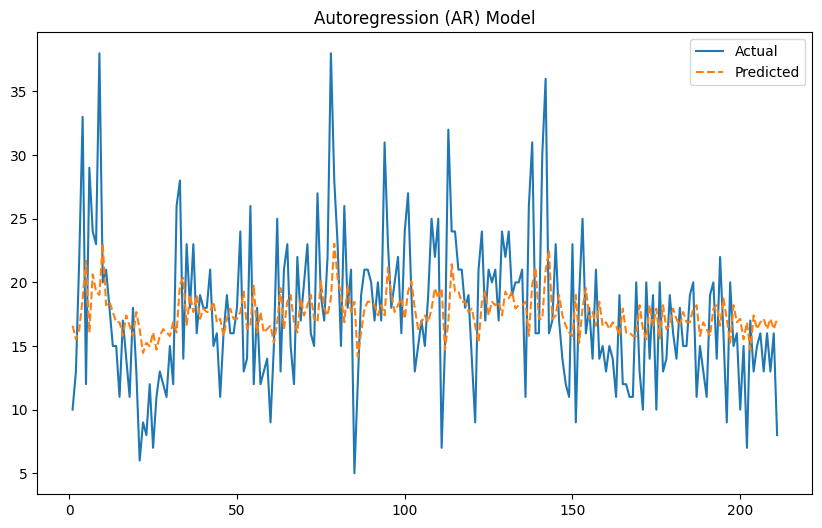


Running Moving Average (MA):


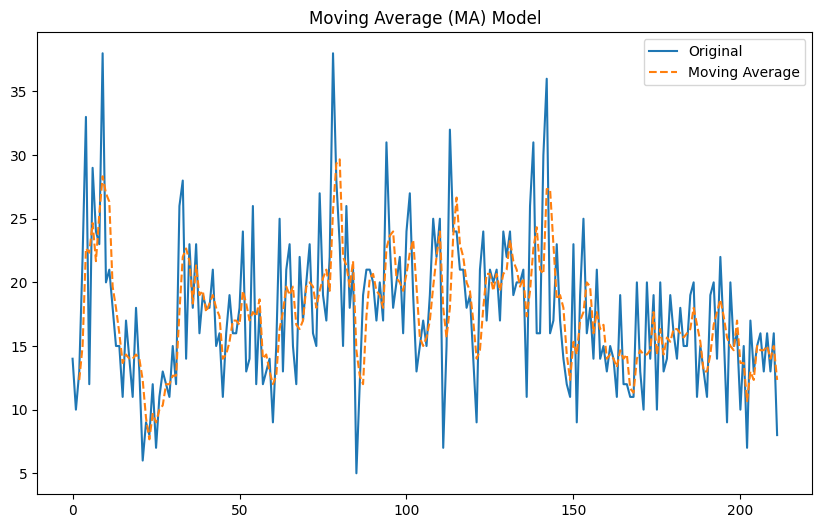


Running ARIMA:

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  212
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -660.577
Date:                Wed, 27 Nov 2024   AIC                           1327.153
Time:                        20:44:17   BIC                           1337.209
Sample:                             0   HQIC                          1331.218
                                - 212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1498      0.072      2.092      0.036       0.009       0.290
ma.L1         -0.9173      0.034    -26.880      0.000      -0.984      -0.850
sigma2        

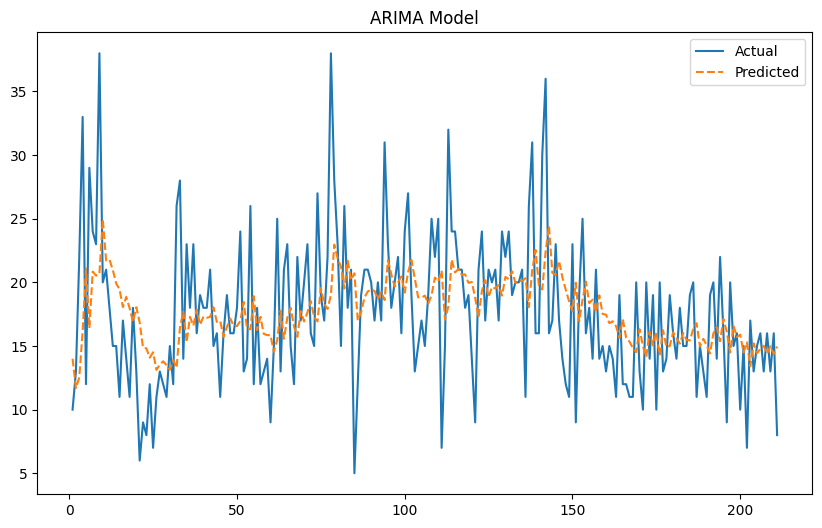


Running SARIMA:

SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                           Quantity   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -637.183
Date:                            Wed, 27 Nov 2024   AIC                           1284.365
Time:                                    20:44:17   BIC                           1300.832
Sample:                                         0   HQIC                          1291.030
                                            - 212                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1517      0.088      1.724      0.085      -0.021       0

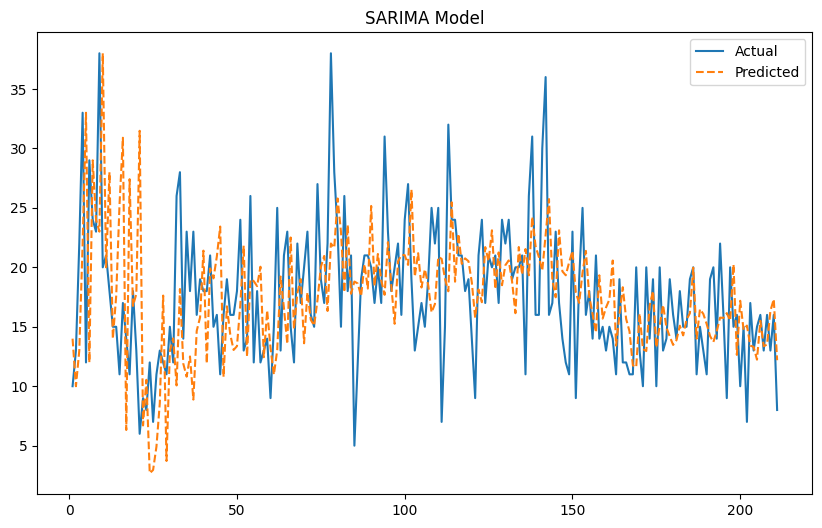


Running ARIMAX:

ARIMAX Model Summary:
                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  212
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -652.349
Date:                Wed, 27 Nov 2024   AIC                           1314.697
Time:                        20:44:18   BIC                           1331.457
Sample:                             0   HQIC                          1321.472
                                - 212                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Clicks          0.0146      0.004      3.579      0.000       0.007       0.023
Impressions     0.0012      0.001      1.322      0.186      -0.001       0.003
ar.L1   

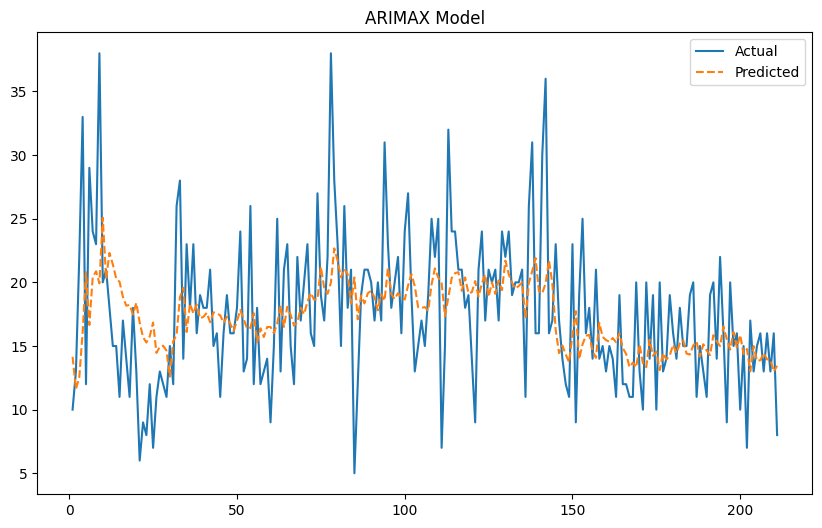


Running SARIMAX:

SARIMAX Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                           Quantity   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -630.969
Date:                            Wed, 27 Nov 2024   AIC                           1275.938
Time:                                    20:44:19   BIC                           1298.991
Sample:                                         0   HQIC                          1285.268
                                            - 212                                         
Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Clicks          0.0191      0.006      3.426      0.001       0.008   

c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


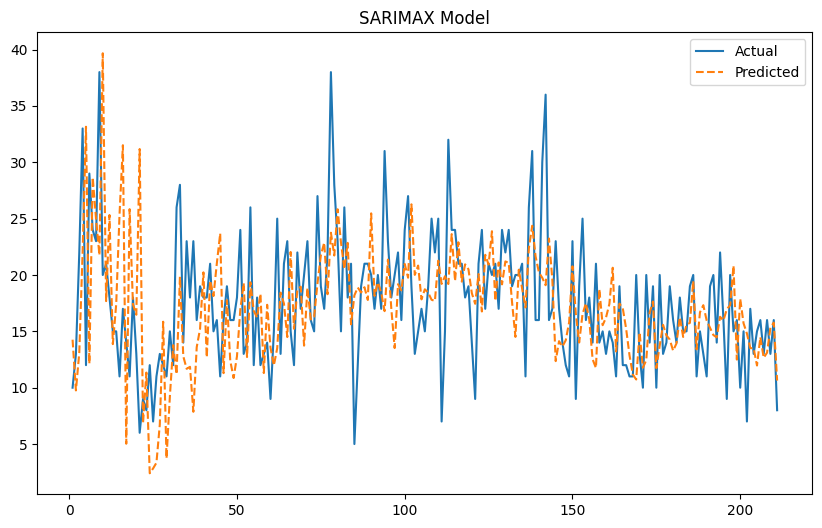

In [10]:
# Step 6: Run all models
print("\nRunning Autoregression (AR):")
run_autoregression(time_series_diff)

print("\nRunning Moving Average (MA):")
run_moving_average(time_series_diff)

print("\nRunning ARIMA:")
run_arima(time_series_diff)

print("\nRunning SARIMA:")
run_sarima(time_series_diff)

print("\nRunning ARIMAX:")
run_arimax(time_series_diff, exog=exogenous_data)

print("\nRunning SARIMAX:")
run_sarimax(time_series_diff, exog=exogenous_data)

## Actions Taken:
1. **Autoregression (AR)**:
   - I ran the AR model to evaluate its ability to capture patterns based solely on past values of the target series.

2. **Moving Average (MA)**:
   - The MA model was applied to smooth the series and generate predictions using a rolling window.

3. **ARIMA**:
   - I tested the ARIMA model to observe its performance in capturing trends and non-stationarity.

4. **SARIMA**:
   - The SARIMA model was run to incorporate both non-seasonal and seasonal components.

5. **ARIMAX**:
   - I evaluated the ARIMAX model by incorporating external variables (`Clicks`, `Impressions`) to enhance its forecasting ability.

6. **SARIMAX**:
   - Finally, the SARIMAX model was executed to leverage both seasonal adjustments and exogenous influences for comprehensive predictions.

# Insights and Final Conclusion:
After analyzing all the models, the **SARIMAX model** stands out as the most suitable choice for this project. Here’s why:
- It effectively captures **seasonality** in the data, which is critical for accurate demand prediction in recurring patterns.
- It incorporates **exogenous variables**, such as `Clicks` and `Impressions`, which significantly influence the target variable (`Quantity`).
- Compared to simpler models like AR and MA, SARIMAX consistently provides better accuracy and a more nuanced understanding of the data.

The SARIMAX model aligns with the project requirements of forecasting with external factors, making it the recommended approach for robust time series analysis and demand prediction.